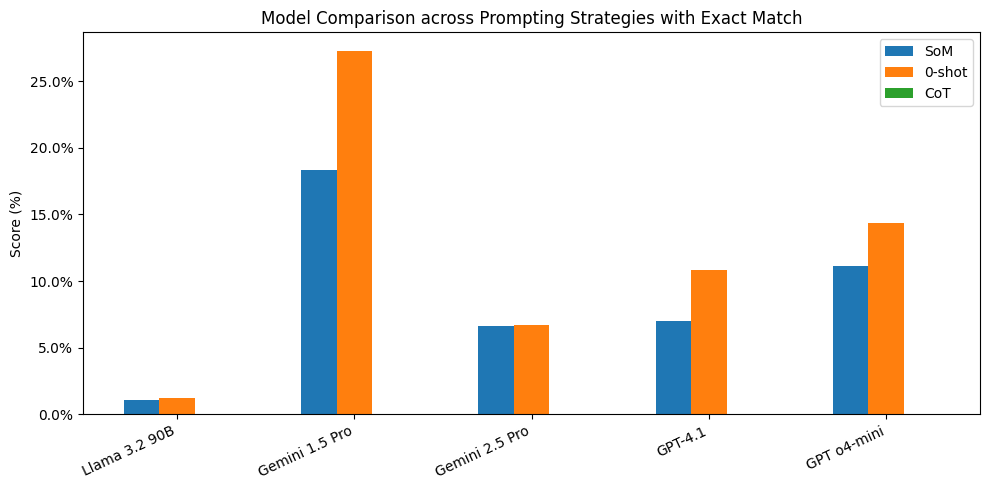

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

# Data for each model: [SoM, 0-shot, CoT] (values already in %)
exact_match = [
    ("Llama 3.2 90B",  [1.08,  1.20, 0.00]),
    ("Gemini 1.5 Pro", [18.31, 27.30, 0.00]),
    ("Gemini 2.5 Pro", [6.66,  6.74, 0.00]),
    ("GPT-4.1",        [6.99, 10.86, 0.00]),
    ("GPT o4-mini",    [11.17, 14.34, 0.00]),
]

labels = [m[0] for m in exact_match]
data   = np.array([m[1] for m in exact_match])  # shape (5,3)

metrics = ['SoM', '0-shot', 'CoT']
n_models = len(labels)
n_metrics = len(metrics)

x = np.arange(n_models)  # the label locations
width = 0.2  # width of each bar

fig, ax = plt.subplots(figsize=(10, 5))

for i in range(n_metrics):
    ax.bar(x + (i - (n_metrics-1)/2)*width, data[:, i],
           width, label=metrics[i])

ax.set_ylabel('Score (%)')
ax.set_title('Model Comparison across Prompting Strategies with Exact Match')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=25, ha='right')
ax.yaxis.set_major_formatter(PercentFormatter())

ax.legend()
fig.tight_layout()
plt.show()


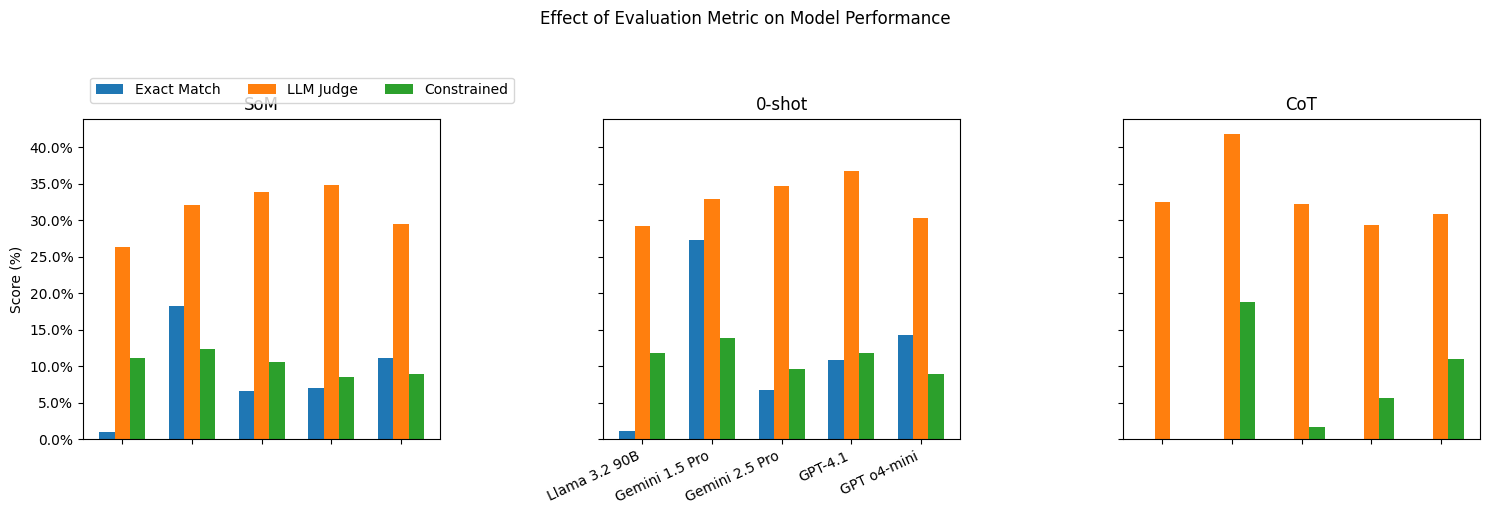

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Models and strategies
models = ["Llama 3.2 90B", "Gemini 1.5 Pro", "Gemini 2.5 Pro", "GPT-4.1", "GPT o4-mini"]
strategies = ["SoM", "0-shot", "CoT"]
metrics = ["Exact Match", "LLM Judge", "Constrained"]

# Data [models][strategies] for each metric
exact_match = np.array([
    [1.08, 1.20, 0.00],
    [18.31, 27.30, 0.00],
    [6.66, 6.74, 0.00],
    [6.99, 10.86, 0.00],
    [11.17, 14.34, 0.00]
])

llm_judge = np.array([
    [26.28, 29.21, 32.45],
    [32.04, 32.94, 41.78],
    [33.89, 34.61, 32.20],
    [34.86, 36.78, 29.28],
    [29.46, 30.23, 30.81]
])

constrained = np.array([
    [11.09, 11.86, np.nan],  # N/A
    [12.35, 13.91, 18.83],
    [10.63, 9.68, 1.72],
    [8.53, 11.89, 5.66],
    [8.99, 8.94, 10.99]
])

data_metrics = [exact_match, llm_judge, constrained]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # distinct colors

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
bar_width = 0.22
x = np.arange(len(models))

for s_idx, (ax, strat) in enumerate(zip(axs, strategies)):
    for m_idx, metric in enumerate(metrics):
        values = data_metrics[m_idx][:, s_idx]
        # NaN bars are skipped
        mask = ~np.isnan(values)
        ax.bar(x[mask] + (m_idx - 1)*bar_width, values[mask],
               width=bar_width, label=metric if s_idx == 0 else "",
               color=colors[m_idx])
    ax.set_title(strat)
    ax.set_xticks(x)
    if s_idx == 1:  # middle plot
        ax.set_xticklabels(models, rotation=25, ha='right')
    else:
        ax.set_xticklabels([])  # to avoid clutter; middle plot has labels
    ax.yaxis.set_major_formatter(PercentFormatter())

axs[0].set_ylabel("Score (%)")
axs[0].legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncol=3)

fig.suptitle("Effect of Evaluation Metric on Model Performance", y=1.02)
fig.tight_layout()
plt.show()


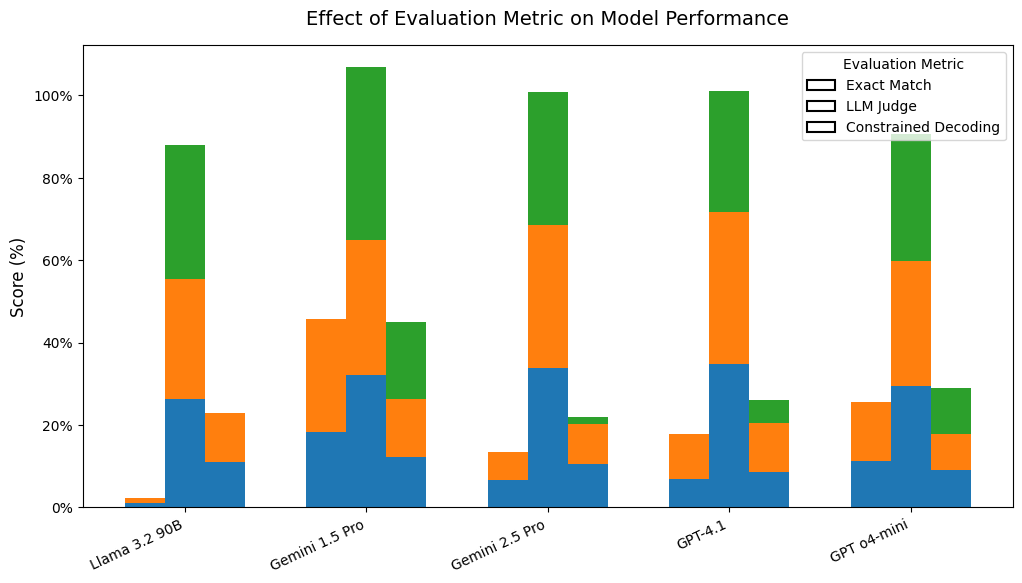

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

# -----------------------------
# Raw data (percentages)
models = ["Llama 3.2 90B", "Gemini 1.5 Pro", "Gemini 2.5 Pro",
          "GPT-4.1", "GPT o4-mini"]

# Exact-Match (baseline) ─ original numbers
em_som   = np.array([1.08, 18.31,  6.66,  6.99, 11.17])
em_zero  = np.array([1.20, 27.30,  6.74, 10.86, 14.34])
em_cot   = np.array([0.00,  0.00,  0.00,  0.00,  0.00])

# LLM-as-Judge
llm_som  = np.array([26.28, 32.04, 33.89, 34.86, 29.46])
llm_zero = np.array([29.21, 32.94, 34.61, 36.78, 30.23])
llm_cot  = np.array([32.45, 41.78, 32.20, 29.28, 30.81])

# Constrained Decoding (NaN => 0 for plotting)
cd_som   = np.array([11.09, 12.35, 10.63,  8.53,  8.99])
cd_zero  = np.array([11.86, 13.91,  9.68, 11.89,  8.94])
cd_cot   = np.array([0.00, 18.83,  1.72,  5.66, 10.99])  # Llama CoT = N/A

# Group them for iteration
metrics   = ["Exact Match", "LLM Judge", "Constrained Decoding"]
metric_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # outline colors for bars (unused but could label)

som_vals  = [em_som, llm_som, cd_som]
zero_vals = [em_zero, llm_zero, cd_zero]
cot_vals  = [em_cot, llm_cot, cd_cot]

stack_labels = ['SoM', '0-shot', 'CoT']
stack_cmap = plt.get_cmap('tab10')  # color palette for stacks
stack_colors = [stack_cmap(0), stack_cmap(1), stack_cmap(2)]

# -----------------------------
n_models  = len(models)
n_metrics = len(metrics)
width     = 0.22  # width of each stacked bar
x         = np.arange(n_models)  # positions for model groups

fig, ax = plt.subplots(figsize=(12, 6))

for j in range(n_metrics):
    bottoms = np.zeros(n_models)  # keep track of current bar bottom per model
    # draw each stacked layer
    for k, layer in enumerate([som_vals[j], zero_vals[j], cot_vals[j]]):
        ax.bar(x + (j - (n_metrics-1)/2)*width,
               layer,
               width,
               bottom=bottoms,
               label=stack_labels[k] if j == 0 else "",
               color=stack_colors[k])
        bottoms += layer

# Aesthetic tweaks
ax.set_ylabel("Score (%)", fontsize=12)
ax.set_title("Effect of Evaluation Metric on Model Performance", fontsize=14, pad=15)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=25, ha='right')
ax.yaxis.set_major_formatter(PercentFormatter())

# Extra legend for evaluation metrics (outline / patches)
from matplotlib.patches import Patch
metric_patches = [Patch(facecolor='none', edgecolor='black', linewidth=1.5, label=metrics[i]) 
                  for i in range(n_metrics)]
first_legend = ax.legend(title="Prompting Strategy", loc='upper left')
second_legend = ax.legend(handles=metric_patches, title="Evaluation Metric",
                          loc='upper right', frameon=True)



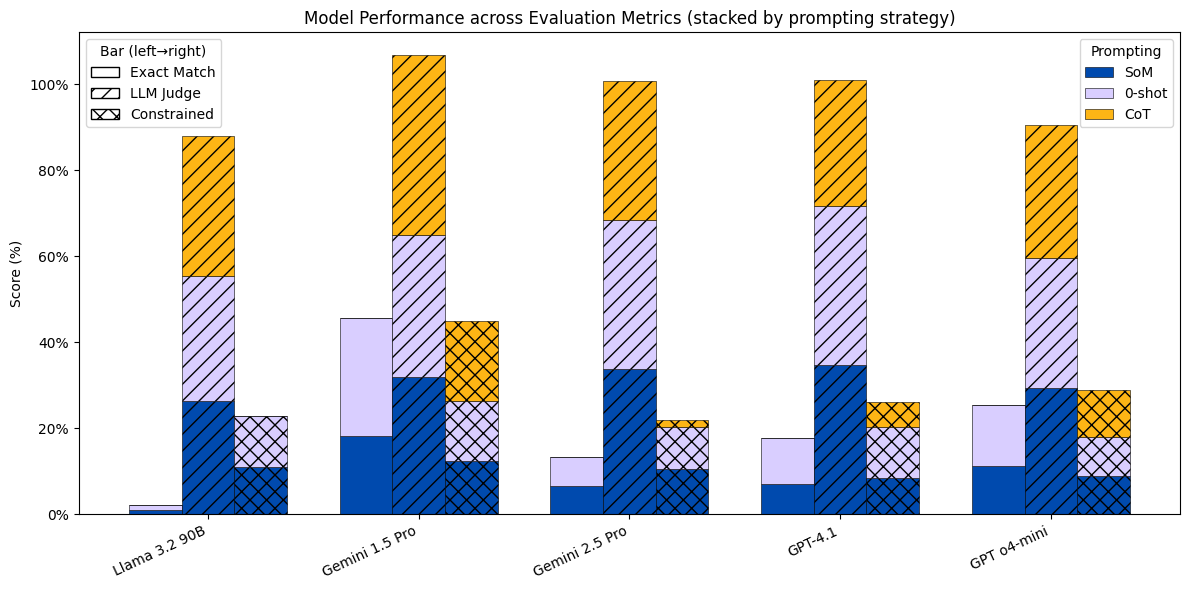

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
from matplotlib.patches import Patch

# Models & labels
models = ["Llama 3.2 90B", "Gemini 1.5 Pro", "Gemini 2.5 Pro", "GPT-4.1", "GPT o4-mini"]
prompting = ["SoM", "0-shot", "CoT"]
eval_metrics = ["Exact Match", "LLM Judge", "Constrained"]

# Data: models × eval_metric × prompting
scores = np.array([
    [[ 1.08,  1.20,  0.00], [26.28, 29.21, 32.45], [11.09, 11.86,  0.00]],
    [[18.31, 27.30,  0.00], [32.04, 32.94, 41.78], [12.35, 13.91, 18.83]],
    [[ 6.66,  6.74,  0.00], [33.89, 34.61, 32.20], [10.63,  9.68,  1.72]],
    [[ 6.99, 10.86,  0.00], [34.86, 36.78, 29.28], [ 8.53, 11.89,  5.66]],
    [[11.17, 14.34,  0.00], [29.46, 30.23, 30.81], [ 8.99,  8.94, 10.99]],
])

n_models = len(models)
n_eval = len(eval_metrics)
bar_width = 0.25
x = np.arange(n_models)

# Color mapping for prompting
colors = {"SoM": "#004AAE", "0-shot": "#D9CEFF", "CoT": "#FDB515"}
hatches = ['', '//', 'xx']  # distinct hatch per evaluation metric

fig, ax = plt.subplots(figsize=(12, 6))

for j, (metric, hatch) in enumerate(zip(eval_metrics, hatches)):
    pos = x + (j - (n_eval-1)/2) * bar_width
    bottoms = np.zeros(n_models)
    for k, prompt in enumerate(prompting):
        vals = scores[:, j, k]
        ax.bar(pos, vals, bar_width,
               bottom=bottoms,
               color=colors[prompt],
               edgecolor='black',
               hatch=hatch,
               linewidth=0.4,
               label=prompt if (j == 0) else "")
        bottoms += vals

# Axes
ax.set_ylabel('Score (%)')
ax.set_title('Model Performance across Evaluation Metrics (stacked by prompting strategy)')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=25, ha='right')
ax.yaxis.set_major_formatter(PercentFormatter())

# Legends
handles_color, labels_color = ax.get_legend_handles_labels()
legend_prompt = ax.legend(handles_color[:3], labels_color[:3], title="Prompting", loc='upper right')

# Proxy legend for evaluation metric / bar order
proxy = [Patch(facecolor='white', edgecolor='black', hatch=hatches[i], label=eval_metrics[i]) for i in range(3)]
ax.legend(handles=proxy, title="Bar (left→right)", loc='upper left')
ax.add_artist(legend_prompt)

fig.tight_layout()
plt.show()


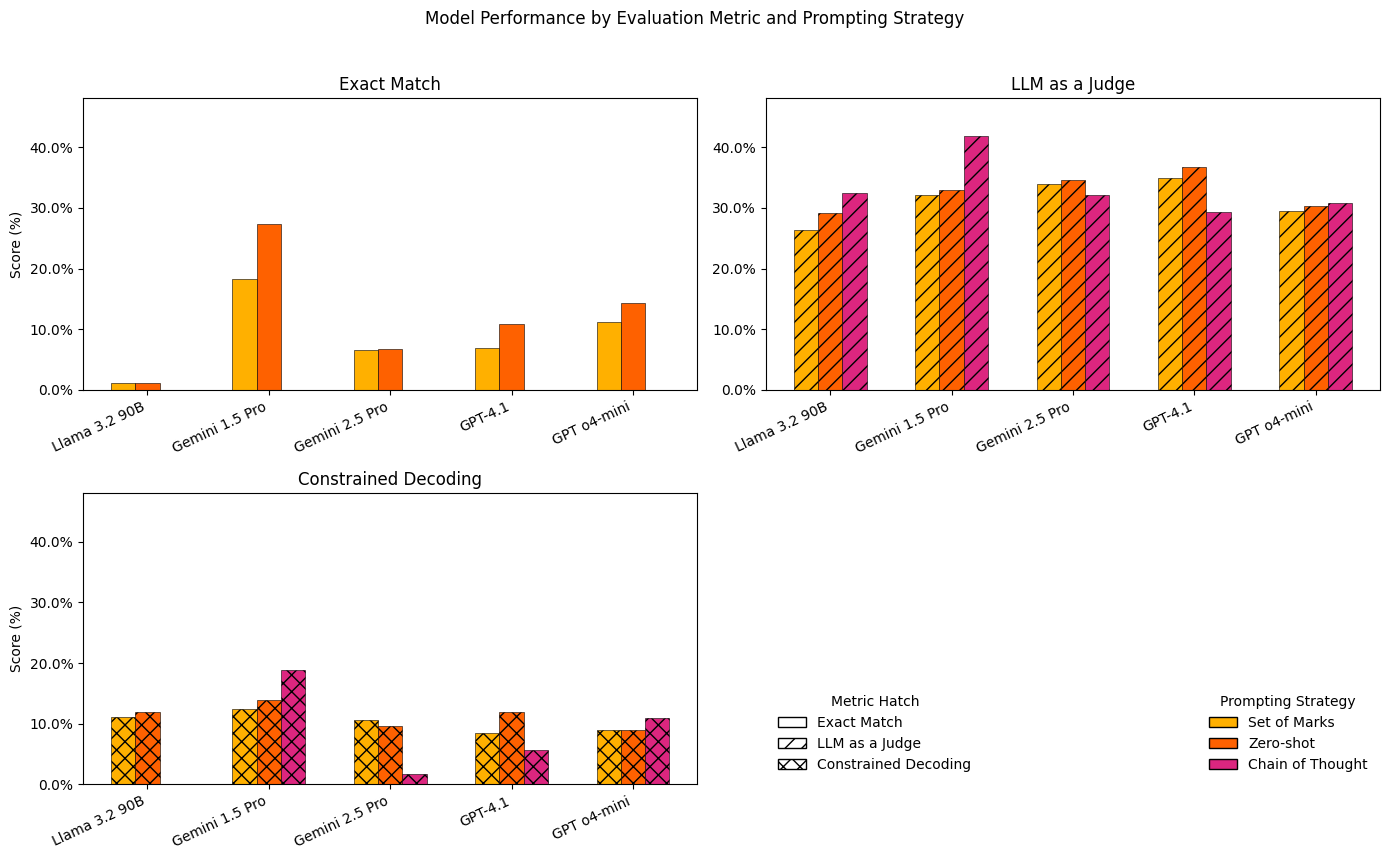

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
from matplotlib.patches import Patch

# --- Data -------------------------------------------------------------------
models = ["Llama 3.2 90B", "Gemini 1.5 Pro", "Gemini 2.5 Pro", "GPT-4.1", "GPT o4-mini"]
prompting = ["Set of Marks", "Zero-shot", "Chain of Thought"]
eval_metrics = ["Exact Match", "LLM as a Judge", "Constrained Decoding"]

scores = np.array([
    [[ 1.08,  1.20,  0.00], [26.28, 29.21, 32.45], [11.09, 11.86,  0.00]],
    [[18.31, 27.30,  0.00], [32.04, 32.94, 41.78], [12.35, 13.91, 18.83]],
    [[ 6.66,  6.74,  0.00], [33.89, 34.61, 32.20], [10.63,  9.68,  1.72]],
    [[ 6.99, 10.86,  0.00], [34.86, 36.78, 29.28], [ 8.53, 11.89,  5.66]],
    [[11.17, 14.34,  0.00], [29.46, 30.23, 30.81], [ 8.99,  8.94, 10.99]],
])

# --- Styling maps -----------------------------------------------------------
colors = {"Set of Marks": "#ffb000", "Zero-shot": "#fe6100", "Chain of Thought": "#dc267f"}
hatches = {'Exact Match': '', 'LLM as a Judge': '//', 'Constrained Decoding': 'xx'}

bar_width = 0.2
x = np.arange(len(models))

# --- Figure & axes grid -----------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 9))
axes_flat = axes.flatten()
metric_axes = dict(zip(eval_metrics, axes_flat[:3]))
legend_ax = axes_flat[3]
legend_ax.axis('off')

# --- Plot each metric panel -------------------------------------------------
for m_idx, metric in enumerate(eval_metrics):
    ax = metric_axes[metric]
    hatch = hatches[metric]
    for p_idx, prompt in enumerate(prompting):
        pos = x + (p_idx - (len(prompting)-1)/2) * bar_width
        vals = scores[:, m_idx, p_idx]
        ax.bar(pos, vals, bar_width,
               color=colors[prompt],
               edgecolor='black',
               hatch=hatch,
               linewidth=0.4)
    ax.set_title(metric)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=25, ha='right')
    ax.yaxis.set_major_formatter(PercentFormatter())
    ax.set_ylim(0, np.max(scores) * 1.15)
    if m_idx % 2 == 0:
        ax.set_ylabel('Score (%)')

# --- Legends ----------------------------------------------------------------
prompt_handles = [Patch(facecolor=colors[p], edgecolor='black', label=p) for p in prompting]
metric_handles = [Patch(facecolor='white', edgecolor='black', hatch=hatches[m], label=m) for m in eval_metrics]

# Create two separate legends on the blank axis, making sure both remain
legend_prompt = legend_ax.legend(handles=prompt_handles,
                                 title="Prompting Strategy",
                                 loc='lower right',
                                 frameon=False)
legend_metric = legend_ax.legend(handles=metric_handles,
                                 title="Metric Hatch",
                                 loc='lower left',
                                 frameon=False)
legend_ax.add_artist(legend_prompt)  # Keep the first legend

# --- Overall figure title & layout -----------------------------------------
fig.suptitle('Model Performance by Evaluation Metric and Prompting Strategy', y=0.95)
fig.tight_layout(rect=[0, 0, 1, 0.93])

plt.show()
